# Домашнее задание 

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных. 

## Задание 1. Кластеризация типов движений (5 баллов)

В этой части задания мы будем работать с набором данных Samsung Human Activity Recognition. Скачайте данные по ссылке https://yadi.sk/d/_WFxgSIuBF06Rg. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

Также есть методичка/овервью от sklearn:
[Методичка](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
root_path = 'gdrive/MyDrive/HSE_ML_HW4/'

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

%matplotlib inline
%config InlineBackend.figure_format="retina"

RANDOM_STATE = 42

### Задание 1.0 (0.1 балл)
Прочитайте данные из файлов и объедните тестовую и обучающие выборки.

В файлах ```..._labels``` лежат настоящие классы. Их также объедините, но в отдельную переменную (например ```y```). Данный вектор для кластеризации нам не нужен, но мы будем смотреть по нему метрики.

In [26]:
def read_data(filename, cast_func):
  with open(root_path + filename) as f:
    file_data = f.readlines()

    df = []
    for line in file_data:
      preprocess_line = line.replace('\n', '').split(' ')
      df.append([cast_func(x) for x in preprocess_line if x != ''])
  
  return df

In [27]:
X = read_data('samsung_train.txt', float) + read_data('samsung_test.txt', float)
y = read_data('samsung_train_labels.txt', int) + read_data('samsung_test_labels.txt', int)

In [28]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

### Задание 1.1 (0.5 баллов)

Отмасштабируйте выборку с помощью ```StandardScaler```.

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Задание 1.2 (0.6 баллов)

Понизьте размерность с помощью ```PCA```, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии отмасштабированных данных. ```random_state``` используйте из объявленной в самом начале переменной ```RANDOM_STATE``` (42).

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [43]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=0.90, svd_solver='full', random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled) 

In [44]:
print("Components =", pca.n_components_)
print("Total explained variance =", round(pca.explained_variance_ratio_.sum(),5))

Components = 65
Total explained variance = 0.90048


In [52]:
X_pca[..., 0]

array([-16.38097982, -15.58217328, -15.42398918, ...,  11.84685312,
         8.20668637,   9.31117251])

### Задание 1.3 (0.3 баллов)

Визуализируйте данные в проекции на первые две главные компоненты. Используйте ```cmap="virdis"``` или любой другой, с которым будет красиво :)

Text(0, 0.5, 'y')

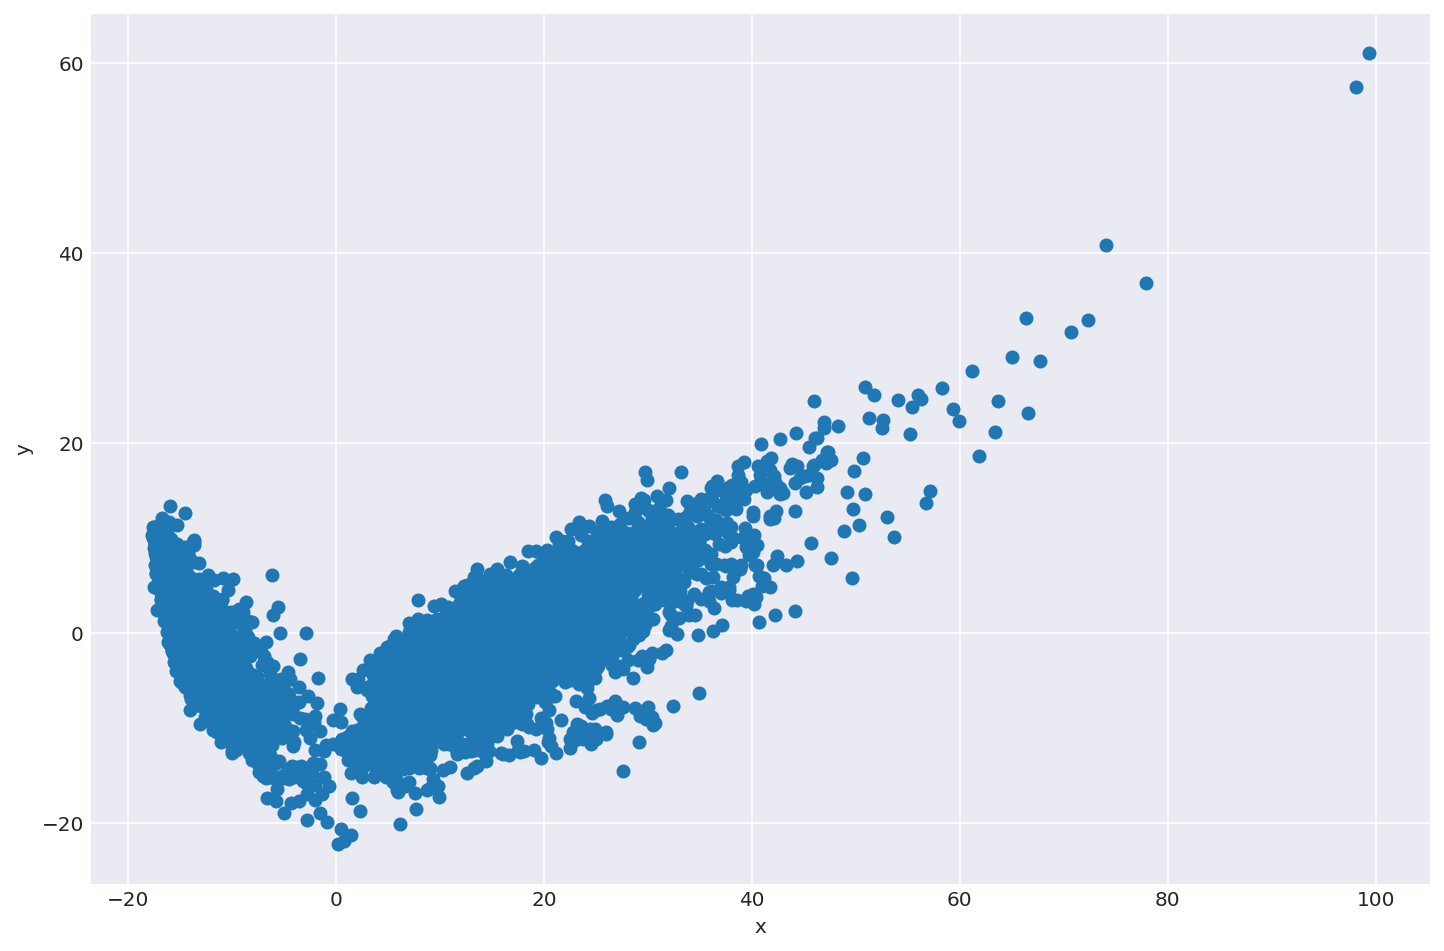

In [55]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[...,0], X_pca[...,1], cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

### Задание 1.4 (0.4 балла)

Сделайте кластеризацию данных методом ```KMeans```, обучив модель на данных со сниженной за счет ```PCA```
размерностью. В данном случае нужно искать 6 кластеров (изначально у нас 6 классов). Засеките время обучения и время инференса.

Параметры:

```n_clusters = 6``` (число уникальных меток целевого класса = 6)

```n_init = 100```

```random_state = RANDOM_STATE``` (для воспроизводимости результата, не забывайте указывать его и дальше!)

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X)
print(kmeans.labels_)

[2 2 2 ... 0 0 0]


### Задание 1.5 (0.2 балла)

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

In [ ]:
#your code here

### Задание 1.6 (0.3 баллов)

Выберите какие-то метрики (минимум две) из известных вам или из методички (ссылка в начале дз, пункт 2.3.10), объясните ваш выбор.

Выведите на экран значения метрик качества кластеризации и используйте их далее.

In [ ]:
#your code here

# your text here

### Задание 1.7 (0.8 баллов)
Теперь попробуем сделать кластеризацию с помощью ```AgglomerativeClustering```.

Вновь визуализируйте данные с раскраской по полученным меткам и выведите метрики. Засеките время обучения и время инференса. Сравните с ```KMeans```.

Ответьте на следующие вопросы:
* Стало ли лучше?
* Почему?

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [ ]:
#your code here

# your text here

### Задание 1.8 (0.8 баллов)

Попробуйте применить другие методы кластеризации из sklearn.  Засеките время обучения и время инференса. Также вычислите метрики качества, визуализируйте результаты, после чего сделайте вывод о том, какой метод сработал лучше.

In [ ]:
#your code here

# your text here

### Задание 1.9 (1 балл)
Для самой успешной из полученных кластеризаций попробуйте дать интерпретацию кластеров. Опишите характеристики объектов, попавших в каждый кластер. Для этого можете ответить на следующие вопросы:

* Похожи ли объекты внутри каждого кластера на определенный тип активности человека?
* В каких кластерах смешано несколько типов активности? С чем, на ваш взгляд, это может быть связано?
* Качественная ли получилась кластеризация? На основании чего вы можете сделать такой вывод?

# your text here

## Задание 2. Разделение изображения на семантические компоненты (5 баллов)

![RedPanda](http://imgur.com/6Aa52Lm.png)

Алгоритмы кластеризации могут применяться в самых разных задачах. Например, в анализе изображений есть задача разделения изображения на семантические компоненты, которую можно решать в том числе с помощью алгоритмов кластеризации. 

Проверим их на ```duck.jpg``` и ```owls.jpg```

### Задание 2.0 (0.1 балл)

Откройте изображения, после чего визуализируйте их с помощью ```plt.imshow()```

In [ ]:
from PIL import Image
# or 
#import cv2

### Задание 2.1 (1.5 балла)
Для каждого изображения, используя кластеризацию ```KMeans```, выделите компоненты, охарактеризовав каждый пиксель следующим образом: $\psi_i = [\lambda x_i, \lambda y_i, r_i, g_i, b_i]$, где 
$x_i$ и $y_i$ — координаты пикселя, $r_i, g_i, b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

Примените полученную функцию, взяв следующие $\lambda$: 0.3 и 1.5 для ```duck.jpg``` и ```owls.jpg``` (или другие, но тогда с вас красивые результаты :) )

Число кластеров подберите разумным образом на свой вкус (в качестве нулевого приближения можно взять 3)

In [ ]:
def find_components(image, lmbd, n_clusters):
    #your code here

### Задание 2.2 (1.5 балла)
Попробуйте выделить сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету. При необходимости можно сжать изображения в 2 раза.

Подсказка: ```skimage``` с его ```color``` и ```transform``` в этом помогут :)

Или же воспользуйтесь аналогичными средствами ```PIL``` или ```cv2``` 

In [ ]:
def spectral_segmentation(image, n_clusters, beta, eps):
    #your code here

### Задание 2.3 (0.9 баллов)
Визуализируйте результаты сегментации (аналогично рисунку в начале задания 2) для обоих методов.

In [ ]:
#your code here

### Задание 2.4 (1 балл)
Найдите интересную картинку милого животного и примените алгоритмы и к ней. Поэкспериментируйте с параметрами алгоритмов. Картинку нужно будет загрузить вместе с работой. Слишком большие лучше не брать - считаться будет долго. Не забудьте визуализировать!

Сравните два подхода и сегментации, к которым они приводят.
Для всех ли изображений в результате сегментации хорошо видны контуры объектов?

In [ ]:
#your code here

# your text here

# Акция
Повеселите проверяющего и вставьте смешной мем. Вдруг повысят балл! Или разместите ваше сообщение о продаже гаража здесь.

[Методичка по мемам](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# your meme here